In [1]:
#to work with arrays
import numpy as np
#to work with dataframe
import pandas as pd

#For visualsation
import matplotlib.pyplot as plt
import seaborn as sns

#to supress warnings
import warnings
warnings.filterwarnings('ignore')

# for train test split
from sklearn.model_selection import train_test_split,KFold,cross_val_score

#for preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Linear Regression
from sklearn.linear_model import LinearRegression

#For calculating R2
from sklearn.metrics import r2_score,mean_squared_error

#Feature selection using Recursive Feature Elimination & RFE with cross validation
from sklearn.feature_selection import RFE,RFECV

#For calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models,
#as well as for conducting statistical tests, and statistical data exploration. 
import statsmodels.api as sm  

In [2]:
car_df=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
def check_the_data(df):
    """ Does basic checks on the input dataframe
    
    Args:
        (df): Dataframe 
       
    """
    print('=============INFO====================')
    print(df.info())
    print('\n=============HEAD====================')
    print(df.head())
    print('\n=============TAIL====================')
    print(df.tail())
    print('\n==========NULL_VALUES================')
    print(df.isnull().sum())

In [4]:
#Basic data checks
check_the_data(car_df)

=============INFO====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  engine

- we have overall 25 columns. 10 columns of object type and 15 of (folat 64 and int64 type)
- there are no null values

## Exploratory Data Analysis

##### 1.carid :
- unique ID for each car.



##### 2.symboling : 
- Its assigned insurance risk rating
- A value of +3 indicates that the auto is risky,
- 3 that it is probably pretty safe.(Categorical)

In [5]:
car_df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

<AxesSubplot:xlabel='symboling', ylabel='count'>

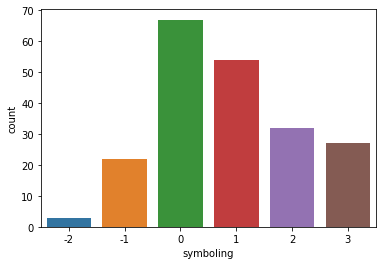

In [6]:
sns.countplot(car_df['symboling'])

##### Inference:
- There cars with 0 symbolling are highest in count.
- The cars with -2 rating are the lowest.

In [7]:
avg_price_per_symbol=car_df[['symboling','price']].groupby(['symboling']).agg({'price': ['mean']})
avg_price_per_symbol.columns=['Average_price']
avg_price_per_symbol = avg_price_per_symbol.reset_index()
avg_price_per_symbol

,symboling,Average_price
0,-2,15781.666667
1,-1,17330.681818
2,0,14366.965179
3,1,10037.907407
4,2,10109.281250
5,3,17221.296296


<AxesSubplot:xlabel='symboling', ylabel='Average_price'>

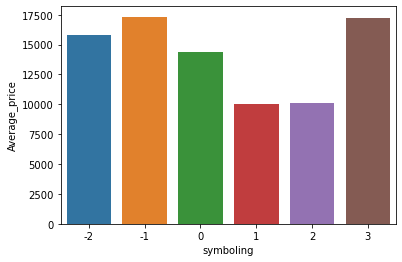

In [8]:
sns.barplot(x='symboling',y='Average_price',data=avg_price_per_symbol)

##### Inference:
- from the above 2 plots we can infer that the cars which are safe with rating like -2 and -1 are costly and also they are in low number
- the cars with lower rating like above 0 are cheaper and they are more numbers

##### 3.CarName:

In [9]:
car_df['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [10]:
#extract the brand name from the car name.
car_df['BrandName']=car_df['CarName'].str.split(' ').apply(lambda x: x[0])

In [11]:
car_df['BrandName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: BrandName, dtype: int64

In [12]:
#There are some typos in the brand names. lets correct them
car_df['BrandName']=car_df['BrandName'].replace(['vw', 'vokswagen'], 'volkswagen')
car_df['BrandName']=car_df['BrandName'].replace('maxda', 'mazda')
car_df['BrandName']=car_df['BrandName'].replace('porcshce', 'porsche')
car_df['BrandName']=car_df['BrandName'].replace('Nissan', 'nissan')
car_df['BrandName']=car_df['BrandName'].replace('toyouta', 'toyota')

In [13]:
car_df['BrandName'].nunique()

22

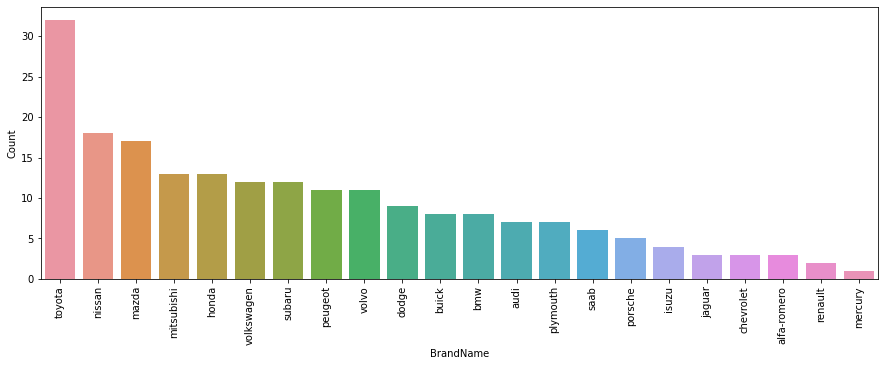

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(car_df['BrandName'],order = car_df['BrandName'].value_counts().index)
plt.xlabel('BrandName')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

- There are more number of car of toyota brand followed by nissan and mazda

In [15]:
#avg_price_of_each brand
avg_price_per_brand_df=car_df[['BrandName','price']].groupby(['BrandName']).agg({'price':['mean']})
avg_price_per_brand_df.columns=['avg_price_per_brand']
avg_price_per_brand_df=avg_price_per_brand_df.reset_index()
avg_price_per_brand_df.sort_values(by='avg_price_per_brand', ascending=False)

,BrandName,avg_price_per_brand
8,jaguar,34600.000000
3,buick,33647.000000
15,porsche,31400.500000
2,bmw,26118.750000
21,volvo,18063.181818
1,audi,17859.166714
10,mercury,16503.000000
0,alfa-romero,15498.333333
13,peugeot,15489.090909
17,saab,15223.333333


In [16]:
price_order=avg_price_per_brand_df.sort_values(by='avg_price_per_brand', ascending=False).BrandName

In [17]:
price_order

8          jaguar
3           buick
15        porsche
2             bmw
21          volvo
1            audi
10        mercury
0     alfa-romero
13        peugeot
17           saab
9           mazda
12         nissan
20     volkswagen
19         toyota
16        renault
11     mitsubishi
7           isuzu
18         subaru
6           honda
14       plymouth
5           dodge
4       chevrolet
Name: BrandName, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

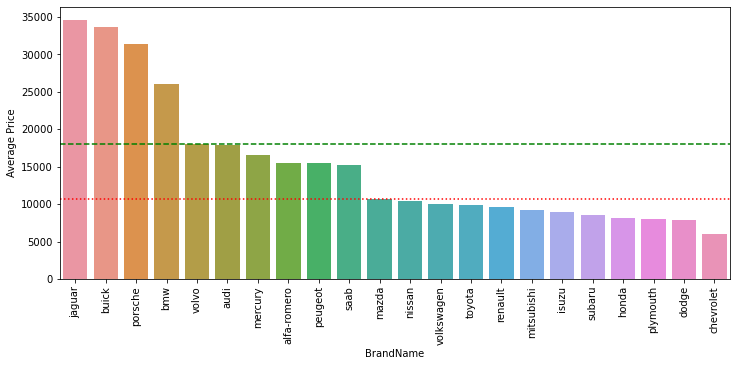

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(x='BrandName',y='avg_price_per_brand',data=avg_price_per_brand_df,order=price_order)
plt.xlabel('BrandName')
plt.ylabel('Average Price')
plt.axhline(10700, color='red', ls='dotted')
plt.axhline(18100, color='green', ls='--')
plt.xticks(rotation=90)
plt.show

##### Inference:

- After comparing two plots (Brandname -vs -count) and (BrandName- vs -Avg_price) the cars like (renault honda toyota isuzu vw )which are lower priced are more in number
- The cars of brand (jaguar, buick ,prosche, bmw) come under highend category.. 
- The cars of brand (volvo, audi ,mercury , alfa-romero, peugeot, saab ) come under medium priced category..
- The cars of brand (mazda,nissan,volkswagen,toyota,renault,mitsubishi,isuzu,subaru,honda,plymouth,dodge,chevrolet) come under low  priced category..          

- budget_friendly: 2000$   to   11000$
- Mid_Range: 11000$  to  20000$
- Luxurious: > 20000$

In [19]:
car_label=['Budget_friendly','Mid_Range','Luxurious']
price_bins=[2000,11000,20000,50000]
car_df['car_category']=pd.cut(car_df['price'],bins=price_bins,labels=car_label)

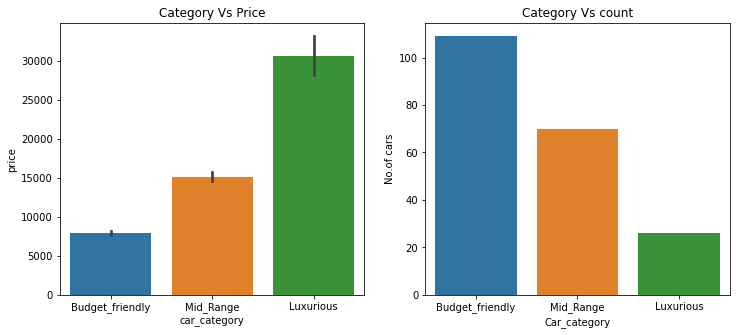

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.barplot(x='car_category',y='price',data=car_df,ax=ax1)
plt.xlabel('Car_category')
plt.ylabel('Price')
ax1.set_title('Category Vs Price')


sns.countplot(x='car_category',data=car_df,ax=ax2)
plt.xlabel('Car_category')
plt.ylabel('No.of cars')
ax2.set_title('Category Vs count')

plt.show()

##### inference:
- The luxurious cars are expensive and less in number

##### 3. FuelType

In [21]:
car_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

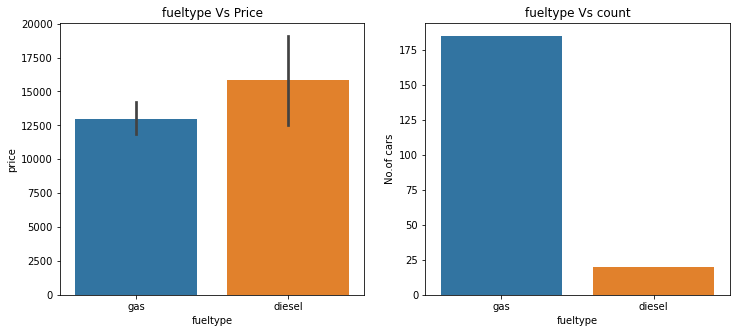

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.barplot(x='fueltype',y='price',data=car_df,ax=ax1)
plt.xlabel('fueltype')
plt.ylabel('Price')
ax1.set_title('fueltype Vs Price')

sns.countplot(x='fueltype',data=car_df,ax=ax2)
plt.xlabel('fueltype')
plt.ylabel('No.of cars')
ax2.set_title('fueltype Vs count')

plt.show()

##### inference
- diesel cars are more costly

##### 4. Aspiration:
- There are many ways to power engines.
- Two of them, are Turbocharger and Natural Aspiration.

In [23]:
car_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

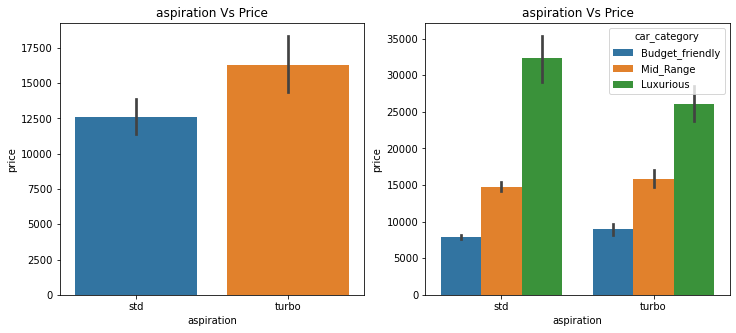

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.barplot(x='aspiration',y='price',data=car_df,ax=ax1)
plt.xlabel('aspiration')
plt.ylabel('Price')
ax1.set_title('aspiration Vs Price')


sns.barplot(x='aspiration',y='price',hue='car_category',data=car_df,ax=ax2)
plt.xlabel('aspiration')
plt.ylabel('price')
ax2.set_title('aspiration Vs Price')

plt.show()

##### Inference
- Cars with Turbo charged engine are expensive. The same can be viualised in above plot.

###### the mostly used aspiration in all cars??
 - std


In [25]:
car_df[['car_category','aspiration']].groupby(['car_category'])['aspiration'].value_counts()

car_category     aspiration
Budget_friendly  std           101
                 turbo           8
Mid_Range        std            48
                 turbo          22
Luxurious        std            19
                 turbo           7
Name: aspiration, dtype: int64

Text(0.5, 1.0, 'Engine aspiration in differnt categories')

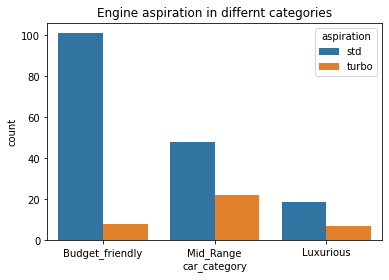

In [26]:
sns.countplot(x='car_category',hue='aspiration',data=car_df)
plt.title('Engine aspiration in differnt categories')

##### inference:
- mostly used engine aspiration is std across all cars

##### 5. Door Number:
- No of doors

In [27]:
car_df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

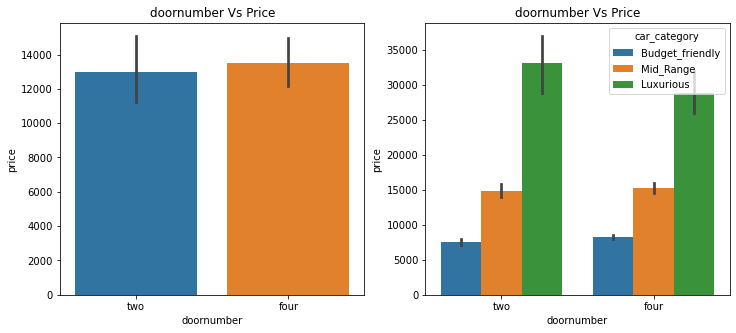

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.barplot(x='doornumber',y='price',data=car_df,ax=ax1)
plt.xlabel('doornumber')
plt.ylabel('Price')
ax1.set_title('doornumber Vs Price')


sns.barplot(x='doornumber',y='price',hue='car_category',data=car_df,ax=ax2)
plt.xlabel('doornumber')
plt.ylabel('price')
ax2.set_title('doornumber Vs Price')

plt.show()

##### Inference:
   
   - The price for 2/4 door cars is almost same
   - we can observe that in the above 2nd plot that the price of 2/4 door cars for diff car categories is almost same for            budgetfriendly and  midrange cars
   - for luxurious cars the 4 door typs is slightly cheaper

In [29]:
car_df[['car_category','doornumber']].groupby(['car_category'])['doornumber'].value_counts()

car_category     doornumber
Budget_friendly  four          58
                 two           51
Mid_Range        four          42
                 two           28
Luxurious        four          15
                 two           11
Name: doornumber, dtype: int64

Text(0.5, 1.0, 'Cars with different no of doors')

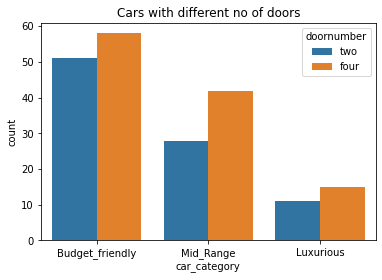

In [30]:
sns.countplot(x='car_category',hue='doornumber',data=car_df)
plt.title('Cars with different no of doors')

##### 6. carbody   
- sedan : Sedans are the cars designed to for comfortable seating of 5 passengers. Sedans come with larger trunk sizes which can be used for carrying larger amount of luggage.The features of sedan includes larger overall dimensions i.e. length, width, height and wheel base. Many times the existing hatchback car design is itself used for sedan with boot space extended.          
- hatchback : The small cars with 4 doors and a boot (dickey) door are classified under hatchback. Generally these are designed for comfortable seating of 4 passengers and small boot space for putting one or two bags.  Ex:Maruti Suzuki 800, Alto, Hyundai i10, i20, Fiat Grande Punto, Tata Indica, Indica Vista     
- wagon : Wagon is the type of vehicle with good combination of hatchback and sedan. These models have advantage of larger space behind the second row. It can be either used for luggage or for putting additional seats as required. The dimensions are larger than hatchback in terms of width, height.Some of the examples for Wagon Type are Maruti Suzuki Wagon R, Mahindra Quanto, Tata Indigo Marina,         
- Hardtop : Open-Air Driving:Convertibles offer the joy of top-down driving, letting the fresh air and sun into the cabin. But the cloth-top element of the convertible raises some questions about security and year-round comfort. A hardtop convertible offers the best of both worlds. A retractable or removable hardtop opens up new opportunities for protection from the elements, added sound-deadening and peace of mind when you walk away from the car. The awkward packaging of some early-2000s power-retractable hardtops combined with improvements in design and construction have led many automakers to pivot back to the classic look of a cloth convertible top. As a result, the hardtop convertible is a rare breed in the modern car market, but they still exist.

- convertible : Convertible cars are the cars whose roof line can be removed or refitted as required. Generally it’s available in high end luxury vehicles. Electro mechanical devices are used for step by step folding of the roof lines. 

In [31]:
car_df['carbody'].nunique()

5

In [32]:
car_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

<AxesSubplot:xlabel='carbody', ylabel='count'>

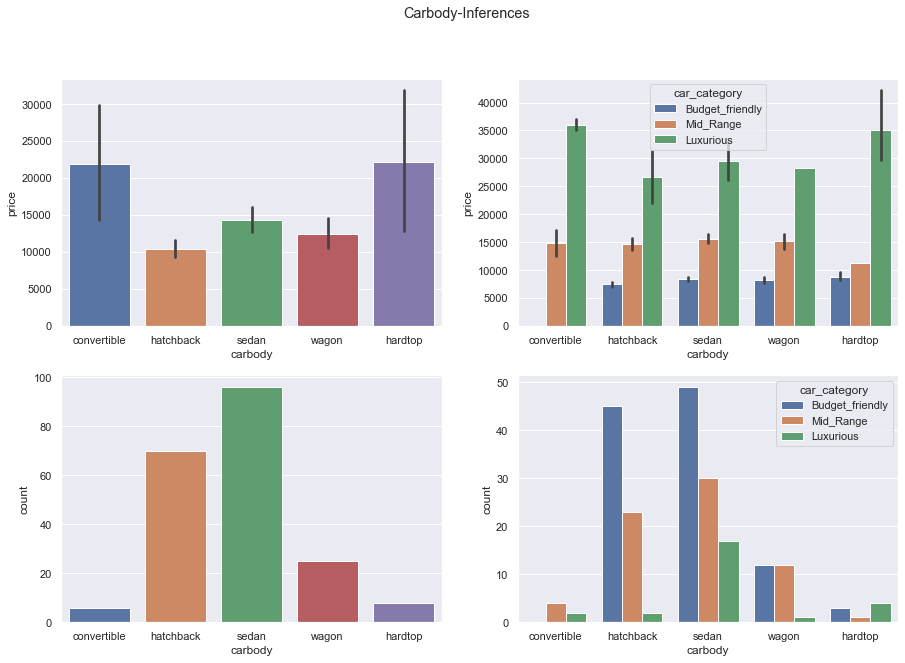

In [33]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle('Carbody-Inferences')

sns.barplot(ax=axes[0, 0], data=car_df, x='carbody', y='price')
sns.barplot(ax=axes[0, 1], data=car_df, x='carbody', y='price',hue='car_category')
sns.countplot(ax=axes[1, 0], data=car_df, x='carbody')
sns.countplot(ax=axes[1, 1], data=car_df, x='carbody',hue='car_category')



##### Inference:
- The hatcheback type of cars are low priced
- The conevrtible and hardtops are expensenvie
- The Sedan and wagon type are mid ranged cost
- there are more number of sedan and hatchback cars

##### 7. DriveWheel:

In [34]:
car_df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

- Front-Wheel Drive:FWD is standard on many cars, crossovers and SUVs for several reasons. With this system, the power from the engine is delivered to the front wheels, so the car is basically being pulled down the road. The back wheels don’t receive power on their own.
- Rear-Wheel Drive:RWD is another type of two-wheel drive, and it’s basically the opposite of FWD. This system sends all of the engine’s power to the back wheels, so it’s like the vehicle is being pushed down the road. The weight of the vehicle is transferred to the rear when you accelerate, which generally boosts traction.RWD vehicles usually have even weight distribution, which improves your overall balance and handling. With RWD trucks and SUVS, adding a load of cargo or towing a trailer helps improve traction. Having a trailer connected close to the driven wheels also helps improve your steering while you’re towing.
- Four-Wheel Drive:Most trucks and large SUVs have 4WD. It’s similar to AWD because it’s designed to send torque to all four wheels to increase traction when needed. However, 4WD is designed to handle more severe off-roading conditions. It allows you to drive over boulders or steep hills, and through deep water.

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

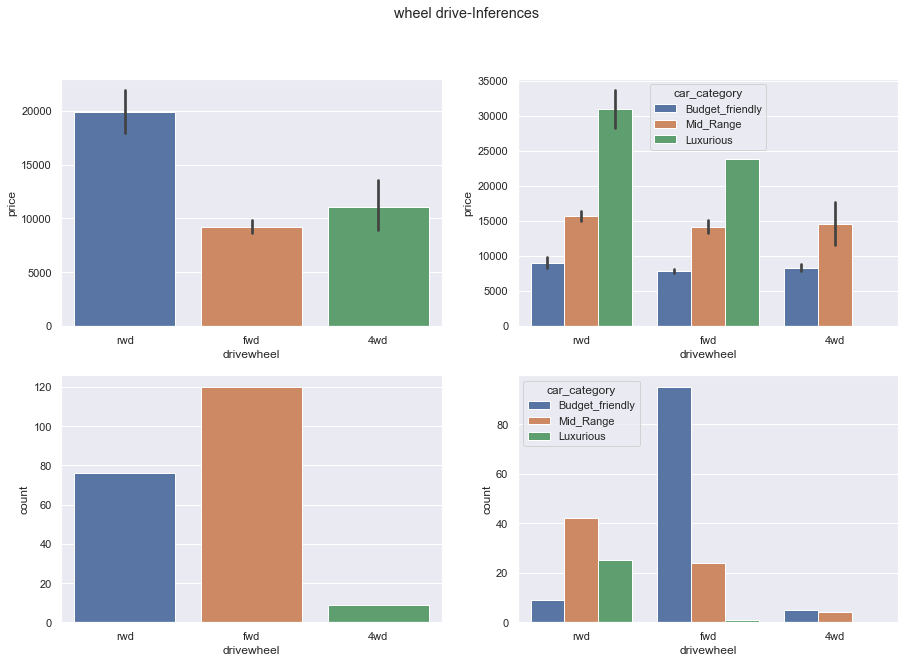

In [35]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle('wheel drive-Inferences')

sns.barplot(ax=axes[0, 0], data=car_df, x='drivewheel', y='price')
sns.barplot(ax=axes[0, 1], data=car_df, x='drivewheel', y='price',hue='car_category')
sns.countplot(ax=axes[1, 0], data=car_df, x='drivewheel')
sns.countplot(ax=axes[1, 1], data=car_df, x='drivewheel',hue='car_category')

##### Inferences:
- The fwd wheel drive has low prices
- The rwd wheel drive has higher prices
- More no of cars with fwd and mostly they are in budget friendly category

##### 8.enginelocation    

In [36]:
car_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

- Front engines are probably most common, found in almost over 98% of cars. You can easily check the engine by popping up the hood of the car as it sits on the top and slightly forward from the front wheels.
  Since most cars are designed as forward wheel drive (FWD), front-engine placement maximizes the traction and control for on-road driving. This is due to the weight of the engine on top of the front wheel. Hence, not much skill is required to maintain steering control even on slippery roads.
- Rear engine cars are even rarer than mid-engine cars. The engine is mounted at the rear beyond the rear wheels. The engine configuration paired with rear-wheel drive (RWD), allows the car to offer improved traction and acceleration.

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

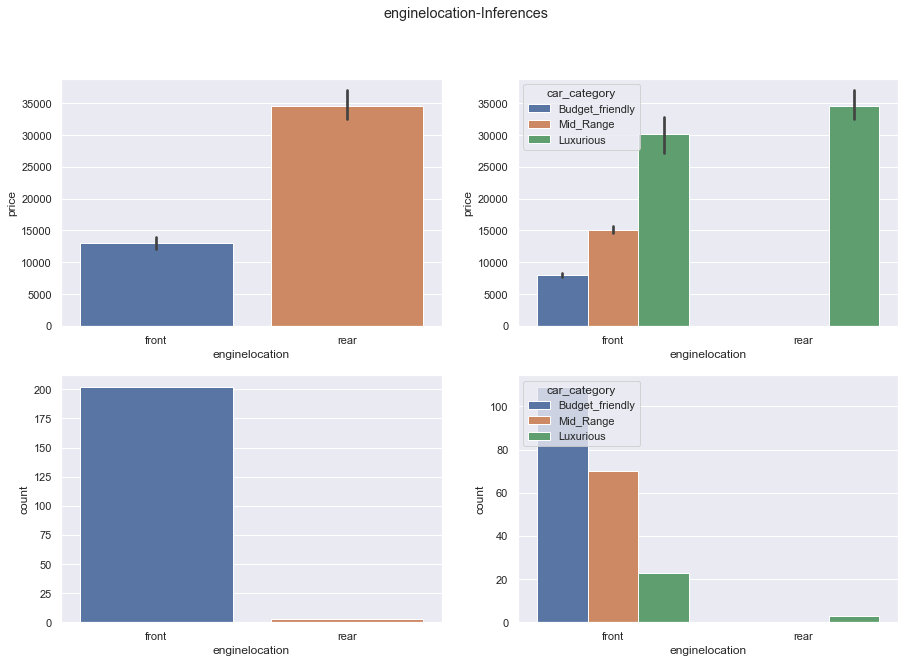

In [37]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle('enginelocation-Inferences')

sns.barplot(ax=axes[0, 0], data=car_df, x='enginelocation', y='price')
sns.barplot(ax=axes[0, 1], data=car_df, x='enginelocation', y='price',hue='car_category')
sns.countplot(ax=axes[1, 0], data=car_df, x='enginelocation')
sns.countplot(ax=axes[1, 1], data=car_df, x='enginelocation',hue='car_category')

##### Inferences:
- Most of the cars have Front engines.
- Among the cars which have rear engines are Luxurious cars.
- Cars with Rear engines are costlier than those with front engine.
- Budget frindly and mid range cars only have front engine.

##### Enginetype

In [38]:
car_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

- The main difference is in the placement of the camshaft. 
- OHV means Over Head Valve. Although almost all modern car engines have valves placed in the cylinder head, the term OHV is used to describe a pushrod engine, with the camshaft placed in the cylinder block. 
- OHC stands for Over Head Cam, or the camshaft is installed in the cylinder head.
- SOHC means Single Overhead Cam.
- DOHC means Double Over Head Cam. A DOHC engine design is often called Twin Cam or Dual Cam. It's the most widely used engine today. The majority of today's cars have a DOHC engine, 

<AxesSubplot:xlabel='enginetype', ylabel='count'>

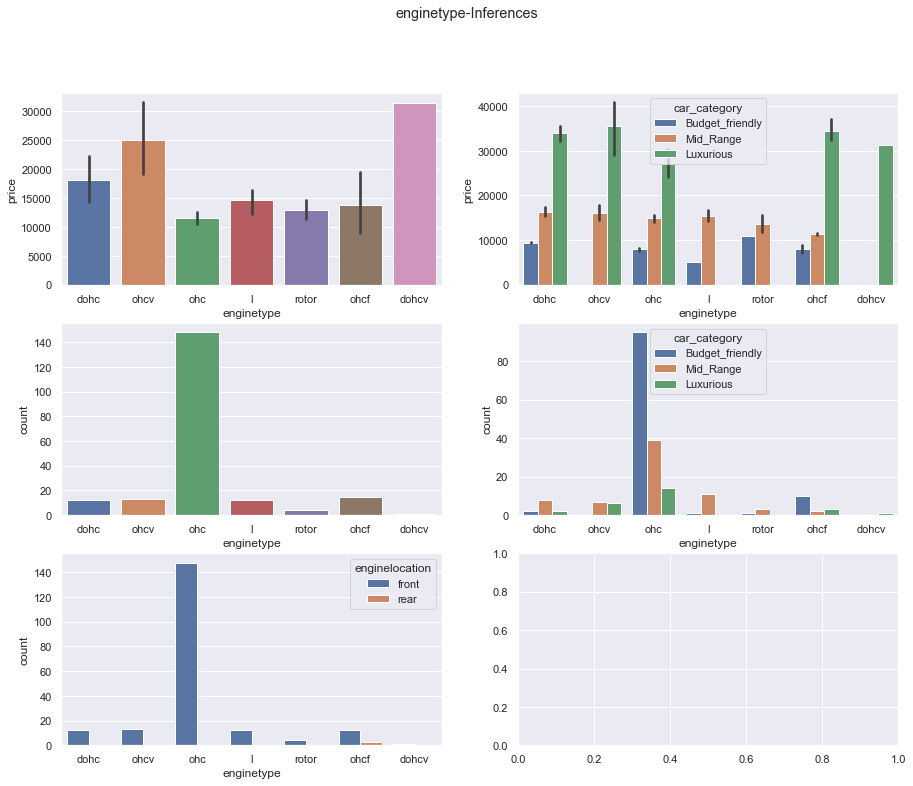

In [39]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

fig.suptitle('enginetype-Inferences')

sns.barplot(ax=axes[0, 0], data=car_df, x='enginetype', y='price')
sns.barplot(ax=axes[0, 1], data=car_df, x='enginetype', y='price',hue='car_category')
sns.countplot(ax=axes[1, 0], data=car_df, x='enginetype')
sns.countplot(ax=axes[1, 1], data=car_df, x='enginetype',hue='car_category')
sns.countplot(ax=axes[2, 0], data=car_df, x='enginetype',hue='enginelocation')

##### Inferences:
- The cars with dohcv engine are very costly.(Luxurious cars have them).
- Most of the cars have ohc engines.
- The cars where the engine is located in rear end have ohcf engine.

##### Cylinder number

A cylinder is a vital part of the engine. It's a chamber where fuel is combusted and power is generated.
The cylinder consists of a piston and two valves at the top; an inlet and exhaust valves.
The piston moves up and down, and its reciprocating motion generates power that moves your vehicle.
Generally, the more cylinders your engine has, the more power is produced. Most cars have a 4, 6, or 8 cylinder engine. 
The numbers indicate the number of cylinders, and they will either be laid out in a straight line, V-shaped or in a flat arrangement. 

In [40]:
car_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

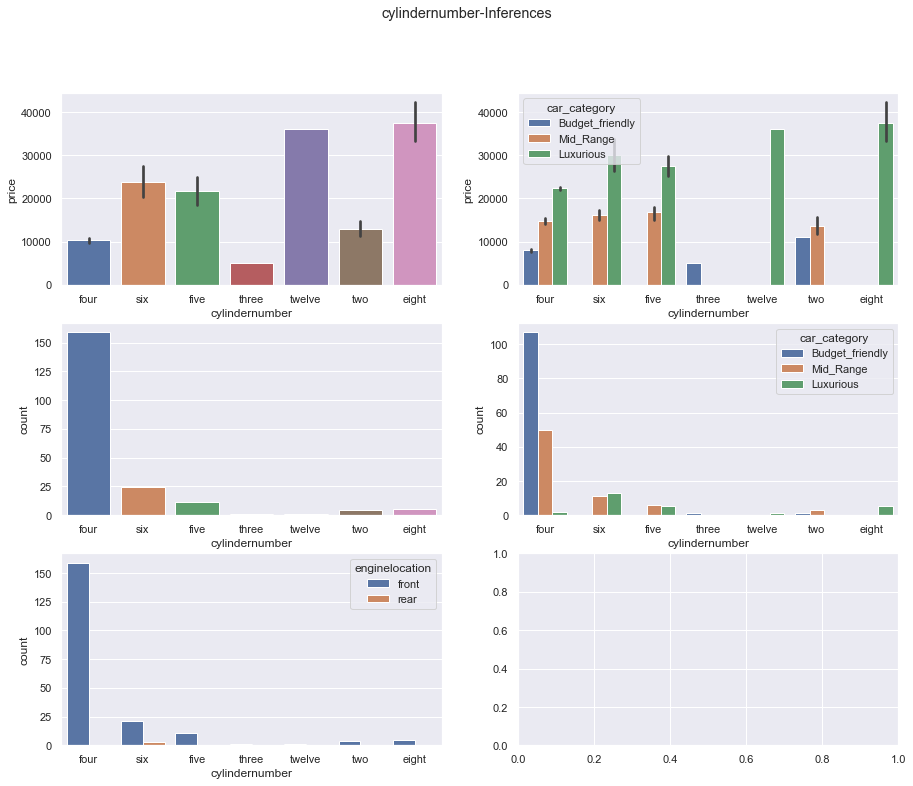

In [41]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

fig.suptitle('cylindernumber-Inferences')

sns.barplot(ax=axes[0, 0], data=car_df, x='cylindernumber', y='price')
sns.barplot(ax=axes[0, 1], data=car_df, x='cylindernumber', y='price',hue='car_category')
sns.countplot(ax=axes[1, 0], data=car_df, x='cylindernumber')
sns.countplot(ax=axes[1, 1], data=car_df, x='cylindernumber',hue='car_category')
sns.countplot(ax=axes[2, 0], data=car_df, x='cylindernumber',hue='enginelocation')
plt.show()

##### Inferences:
- The cars with 8 and 12 cylinders are very costly.(Luxurious cars have them).
- The cars with 3 and 4 cylinders are cheaper.
- Most of the cars have 4 cylinders.

##### Fuelsystem

- MPFI: Multipoint fuel injection devotes a separate injector nozzle to each cylinder, right outside its intake port, which is why the system is sometimes called port injection
- 2bbl: 2 Barrel Fuel Injection
- IDI:  indirect injection (IDI). is when the fuel injection is not directly injected into the combustion chamber. Instead,fuel goes into a pre-combustion chamber or an air cell to begin the process that then spreads into the main combustion
- 1bbl: 1 Barrel Fuel Injection
- 4bbl: 4 Barrel Fuel Injection
- MFI : Most modern vehicles have multi-port fuel injection (MFI) with a separate fuel injector for each cylinder.This system mixes the fuel and air together right in the intake port for eachengine cylinder just ahead of the intake valve.    
- SPFI: Sequential fuel injection, also called sequential port fuel injection (SPFI) or timed injection, is a type of multiport injection. Though basic MPFI employs multiple injectors, they all spray their fuel at the same time or in groups. As a result, the fuel may “hang around” a port for as long as 150 milliseconds when the engine is idling. This may not seem like much, but it’s enough of a shortcoming that engineers addressed it: Sequential fuel injection triggers each injector nozzle independently. Timed like spark plugs, they spray the fuel immediately before or as their intake valve opens.It seems like a minor step, but efficiency and emissions improvements come in very small doses.

    

In [42]:
car_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

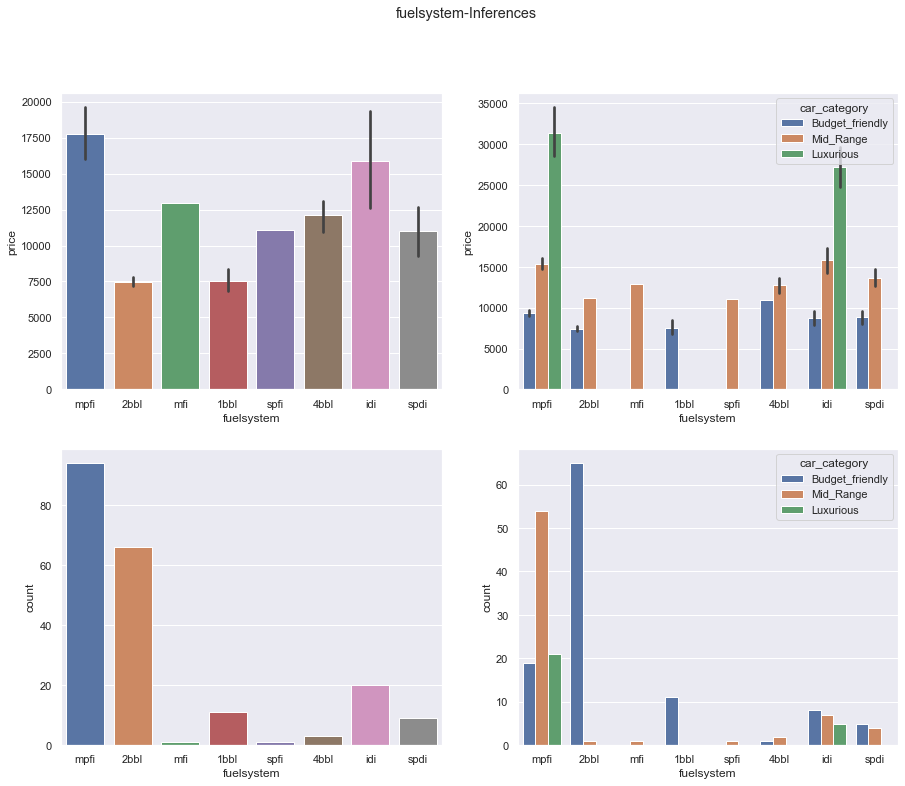

In [43]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

fig.suptitle('fuelsystem-Inferences')

sns.barplot(ax=axes[0, 0], data=car_df, x='fuelsystem', y='price')
sns.barplot(ax=axes[0, 1], data=car_df, x='fuelsystem', y='price',hue='car_category')
sns.countplot(ax=axes[1, 0], data=car_df, x='fuelsystem')
sns.countplot(ax=axes[1, 1], data=car_df, x='fuelsystem',hue='car_category')
plt.show()

##### Inferences:
- Mpfi and IDI fuel system are expensive
- Most of the cars have mpfi fuel system

<span style="color:crimson;">wheebase:</span>
- It is the horizontal distance between the centers of the front and rear wheels

<span style="color:crimson;">carlength:</span>
- Typically, the average length of a car is around 14.7 feet.

<span style="color:crimson;">carwidth:</span>
- Typically, the average car width is around 5.8 feet. 

<span style="color:crimson;">carheight:</span>
- The average car is about five feet to six feet high (60 to 72 inches), 

<span style="color:crimson;">curbweight:</span>
- Curb weight is the weight of the vehicle including a full tank of fuel and all standard equipment. It does not include the weight of any passengers, cargo, or optional equipment. Curb weight is considered the closest weight to the actual weight of the vehicle.


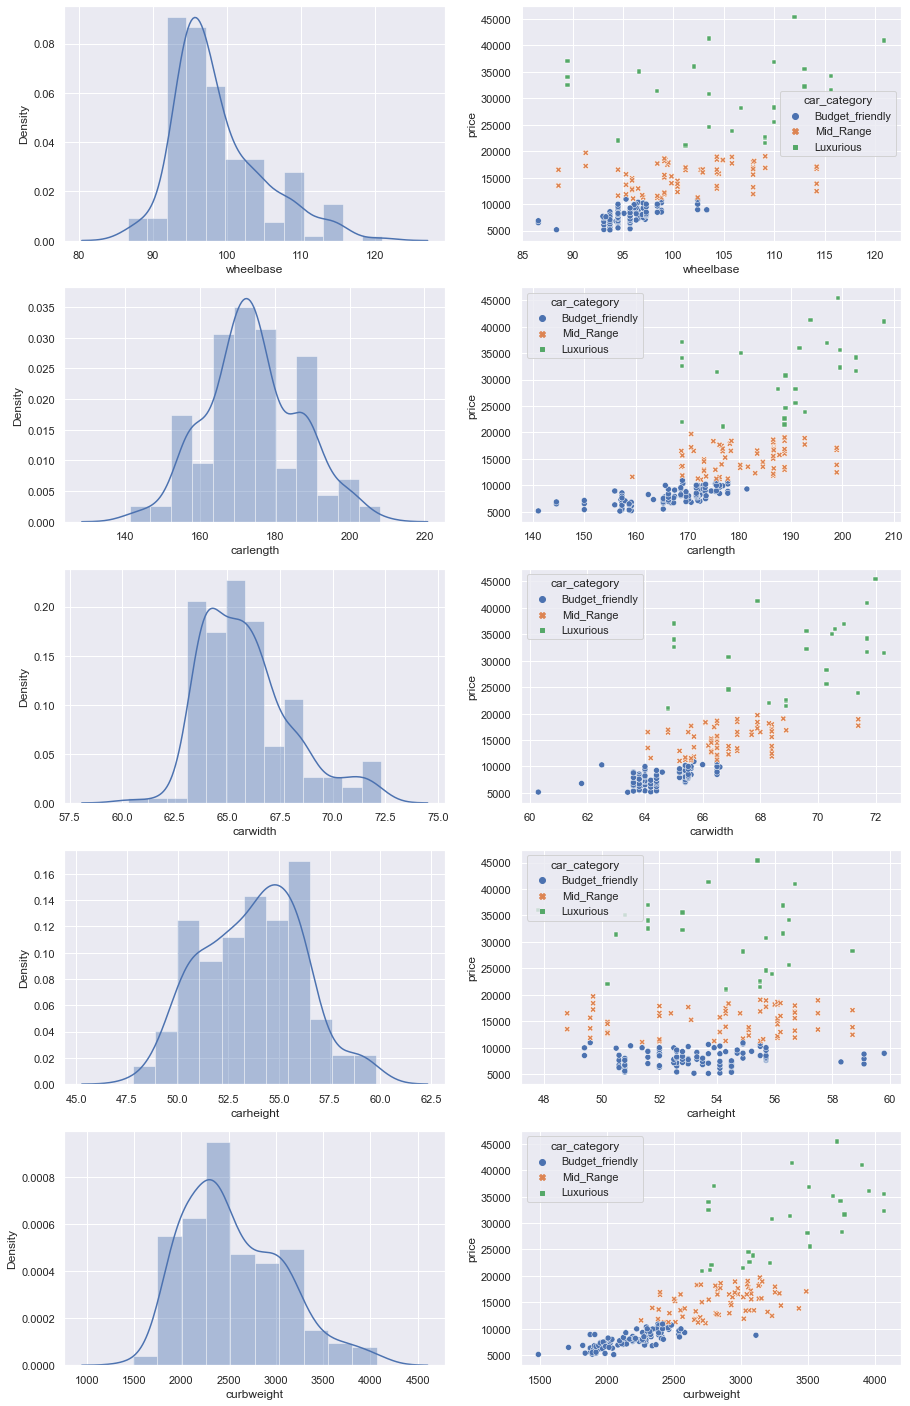

In [44]:
a=5
b=2
c=1

col_list=['wheelbase','carlength','carwidth','carheight','curbweight']
fig = plt.figure(figsize=(15,25))

for each in col_list:
    plt.subplot(a,b,c)
    sns.distplot(car_df[each])
    c+=1

    plt.subplot(a,b,c)
    sns.scatterplot(data=car_df, x=each, y='price',hue='car_category',style="car_category")
    c+=1


##### Inference:
**Wheelbase:**
- for the budget friendly cars the wheelbase is lessthan ~100 and price is less than ~ 11000$.
- But the for the midrange and luxurious cars we cannot diffrentiate based on wheelbase.

**Carlength:**
- when the car length is in between ~168 to ~180 the discrimination is not possible the price is low medium and high.

**carwidth:**
- when the car width is in between ~64 to ~69 the discrimination is not possible the price is low medium and high.

**carheight:**
- as the car height incrases we cant say that price also increases. There are budget friendly cars with greater height and low price.

**curbweight:**
- as the curbweight incrases we can say that price also increases. except for some brands.

All the above factors are postively correlated but the curbweight,carlength,carwidth has strong positive correlation.


<span style="color:crimson;">enginesize:</span>

- Engine size is the volume of fuel and air that can be pushed through a car’s cylinders and is measured in cubic centimetres (cc). Car engine sizes are normally specified in litres, which is rounded up to the nearest tenth of a litre. For example, a car that has a 1390cc engine would be described as a 1.4 litre.        

<span style="color:crimson;">boreratio:</span>
- Bore-Stroke Ratio is the ratio between the dimensions of the engine cylinder bore diameter to its piston stroke-length.

<span style="color:crimson;">stroke:</span>
- In the context of an internal combustion engine, the term stroke has the following related meanings.A phase of the engine's cycle (e.g. compression stroke, exhaust stroke), during which the piston travels from top to bottom or vice versa.The type of power cycle used by a piston engine (e.g. two-stroke engine, four-stroke engine)."Stroke length", the distance travelled by the piston during each cycle. The stroke length––along with bore diameter––determines the engine's displacement.

<span style="color:crimson;">compressionratio:</span>
- The compression ratio is the ratio between the volume of the cylinder and combustion chamber in an internal combustion engine at their maximum and minimum values.

<span style="color:crimson;">horsepower:</span>
   
- Horsepower (hp) is a unit of measurement of power, or the rate at which work is done, usually in reference to the output of engines or motors. There are many different standards and types of horsepower. Two common definitions used today are the mechanical horsepower (or imperial horsepower), which is about 745.7 watts and the metric horsepower, which is approximately 735.5 watts.
   
<span style="color:crimson;">peakrpm:</span>
- The full form of RPM is Revolutions Per Minute. More RPM means higher speed or power produced by the engine. While RPM is an important factor associated with cars’ performance.RPM is extremely important in cars with manual transmission. However, for cars with automatic transmission, noticing RPM is not that important as the car automatically calculates the number of rotations and controls the transmission accordingly to decrease or increase the speed.

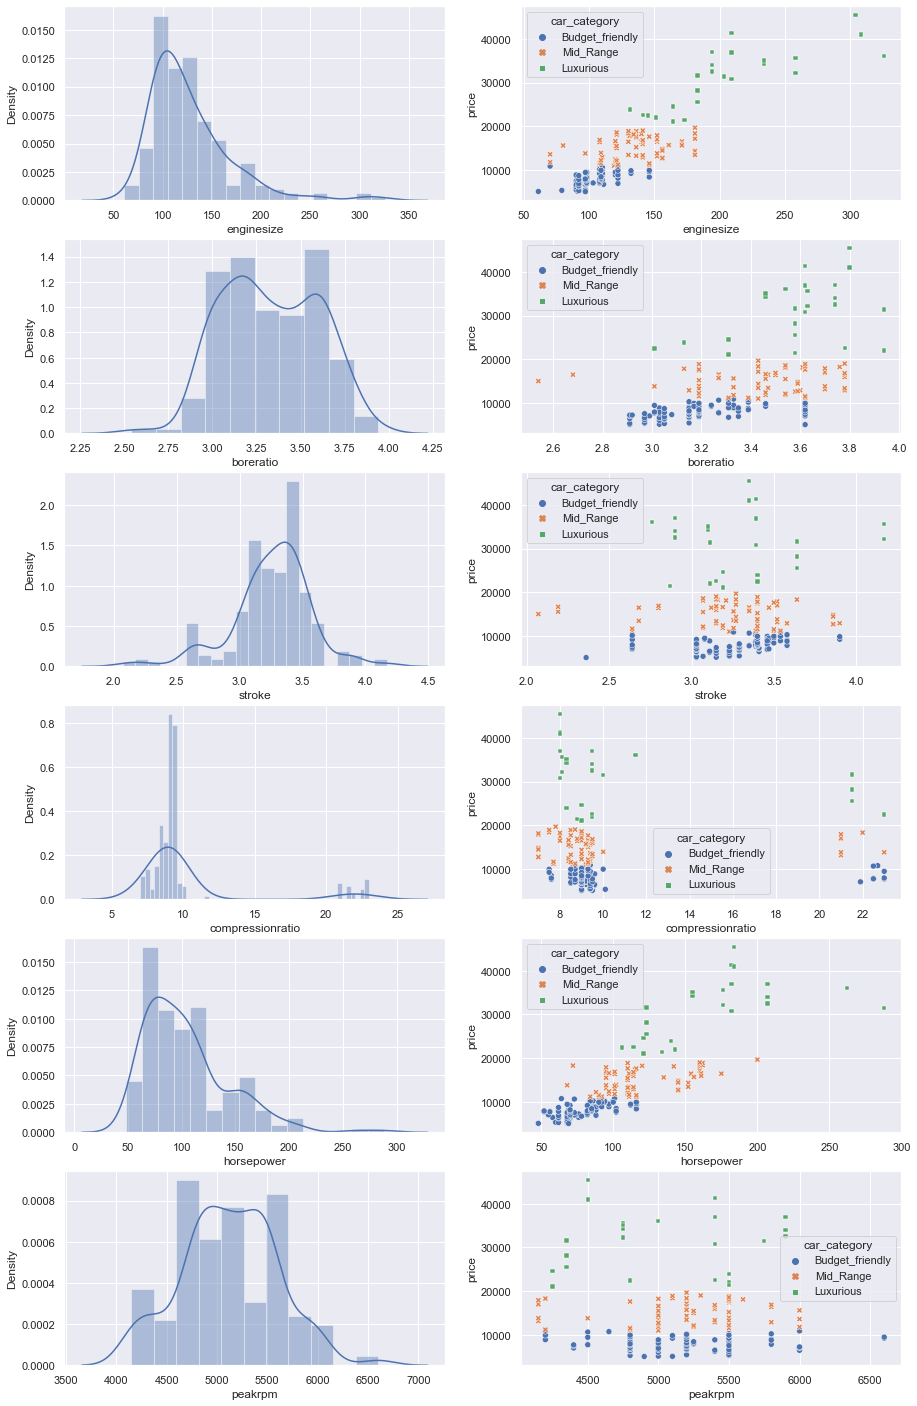

In [45]:
a=6
b=2
c=1

col_list=['enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm']
fig = plt.figure(figsize=(15,25))

for each in col_list:
    plt.subplot(a,b,c)
    sns.distplot(car_df[each])
    c+=1

    plt.subplot(a,b,c)
    sns.scatterplot(data=car_df, x=each, y='price',hue='car_category',style="car_category")
    c+=1

##### Inference:
- **enginesize:**
The engine size is positively correlated with the price.
the is a linear trend.

- **Boreratio:** as the boreration increases price increases but there are some exceptions.
    
- **stroke:** There is not so much postive correlation with price
    
- **compression ratio:** This not very much positively correlated to the price.

- **horsepower:** as the hp increase the price is also increasing.
- **peakrpm:** There is no strong positive correlation between peak rpm and the price.

<span style="color:crimson;">citympg:</span>
- the score a car will get on average in city conditions, with stopping and starting at lower speeds.

<span style="color:crimson;">highwaympg:</span>
- the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.

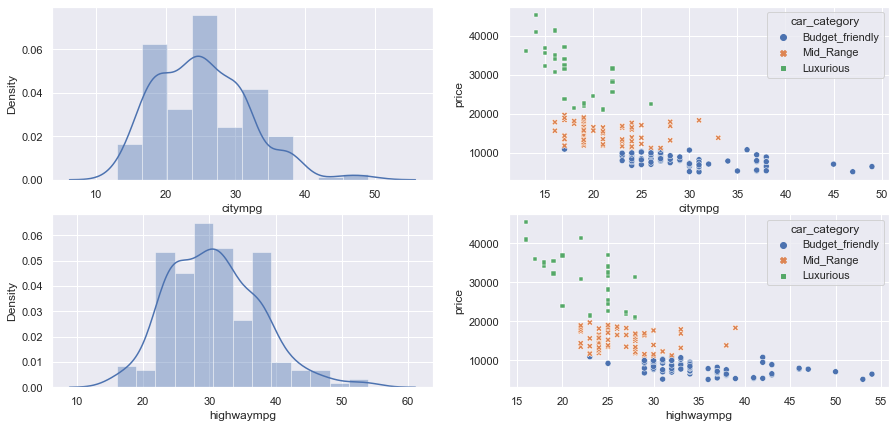

In [46]:
a=2
b=2
c=1

col_list=['citympg','highwaympg']
fig = plt.figure(figsize=(15,7))

for each in col_list:
    plt.subplot(a,b,c)
    sns.distplot(car_df[each])
    c+=1

    plt.subplot(a,b,c)
    sns.scatterplot(data=car_df, x=each, y='price',hue='car_category',style="car_category")
    c+=1

In [47]:
car_df['Avg_mileage']=(car_df['citympg']+car_df['highwaympg'])*0.5

In [48]:
car_df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,BrandName,car_category,Avg_mileage
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,Mid_Range,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,Mid_Range,24.0


<AxesSubplot:xlabel='Avg_mileage', ylabel='price'>

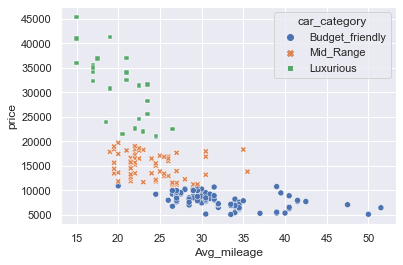

In [49]:
sns.scatterplot(data=car_df, x='Avg_mileage', y='price',hue='car_category',style="car_category")

##### Inference:
- **citympg:**The citympg is not positively correlated with the price. **Negatively correlated**

- **highwaympg:**The highwaympg is not positively correlated with the price. **Negatively correlated**
- **Avg_mileage:**The Average_mileage is not positively correlated with the price. **Negatively correlated** 

### Finally here is the list of variables which affect the price

1.Car_category
2.Fueltype
3.aspiration
4.carbody
5.drivewheel
6.enginelocation
7.enginetype
8.cylindernumber
9.fuelsystem     
10.curbweight   
11.carlength
12.carwidth
13.enginesize
14.boreratio
15.horsepower
16.Avg_mileage

In [50]:
final_df=car_df[['car_category','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','curbweight','carlength','carwidth','enginesize','boreratio','horsepower','Avg_mileage','price']]

In [51]:
#convert the categorical variables to numeric type using get dummies
def dummy_vars(ind_vars,df):
    
    for each in ind_vars:
        temp=pd.get_dummies(df[each],drop_first=True)
        df=pd.concat([df,temp],axis=1)
        df.drop(each,axis=1,inplace=True)
        
    return df


In [52]:
categorical_var_list=['car_category','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']


In [53]:
final_df=dummy_vars(categorical_var_list,final_df)

In [54]:
final_df.head(3)

,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,Avg_mileage,price,Mid_Range,Luxurious,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,2548,168.8,64.1,130,3.47,111,24.0,13495.0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2548,168.8,64.1,130,3.47,111,24.0,16500.0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2823,171.2,65.5,152,2.68,154,22.5,16500.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curbweight   205 non-null    int64  
 1   carlength    205 non-null    float64
 2   carwidth     205 non-null    float64
 3   enginesize   205 non-null    int64  
 4   boreratio    205 non-null    float64
 5   horsepower   205 non-null    int64  
 6   Avg_mileage  205 non-null    float64
 7   price        205 non-null    float64
 8   Mid_Range    205 non-null    uint8  
 9   Luxurious    205 non-null    uint8  
 10  gas          205 non-null    uint8  
 11  turbo        205 non-null    uint8  
 12  hardtop      205 non-null    uint8  
 13  hatchback    205 non-null    uint8  
 14  sedan        205 non-null    uint8  
 15  wagon        205 non-null    uint8  
 16  fwd          205 non-null    uint8  
 17  rwd          205 non-null    uint8  
 18  rear         205 non-null    uint8  
 19  dohcv   

In [56]:
#we can observe that all the columns are in numerics

In [57]:
correlation=final_df.corr()

<AxesSubplot:>

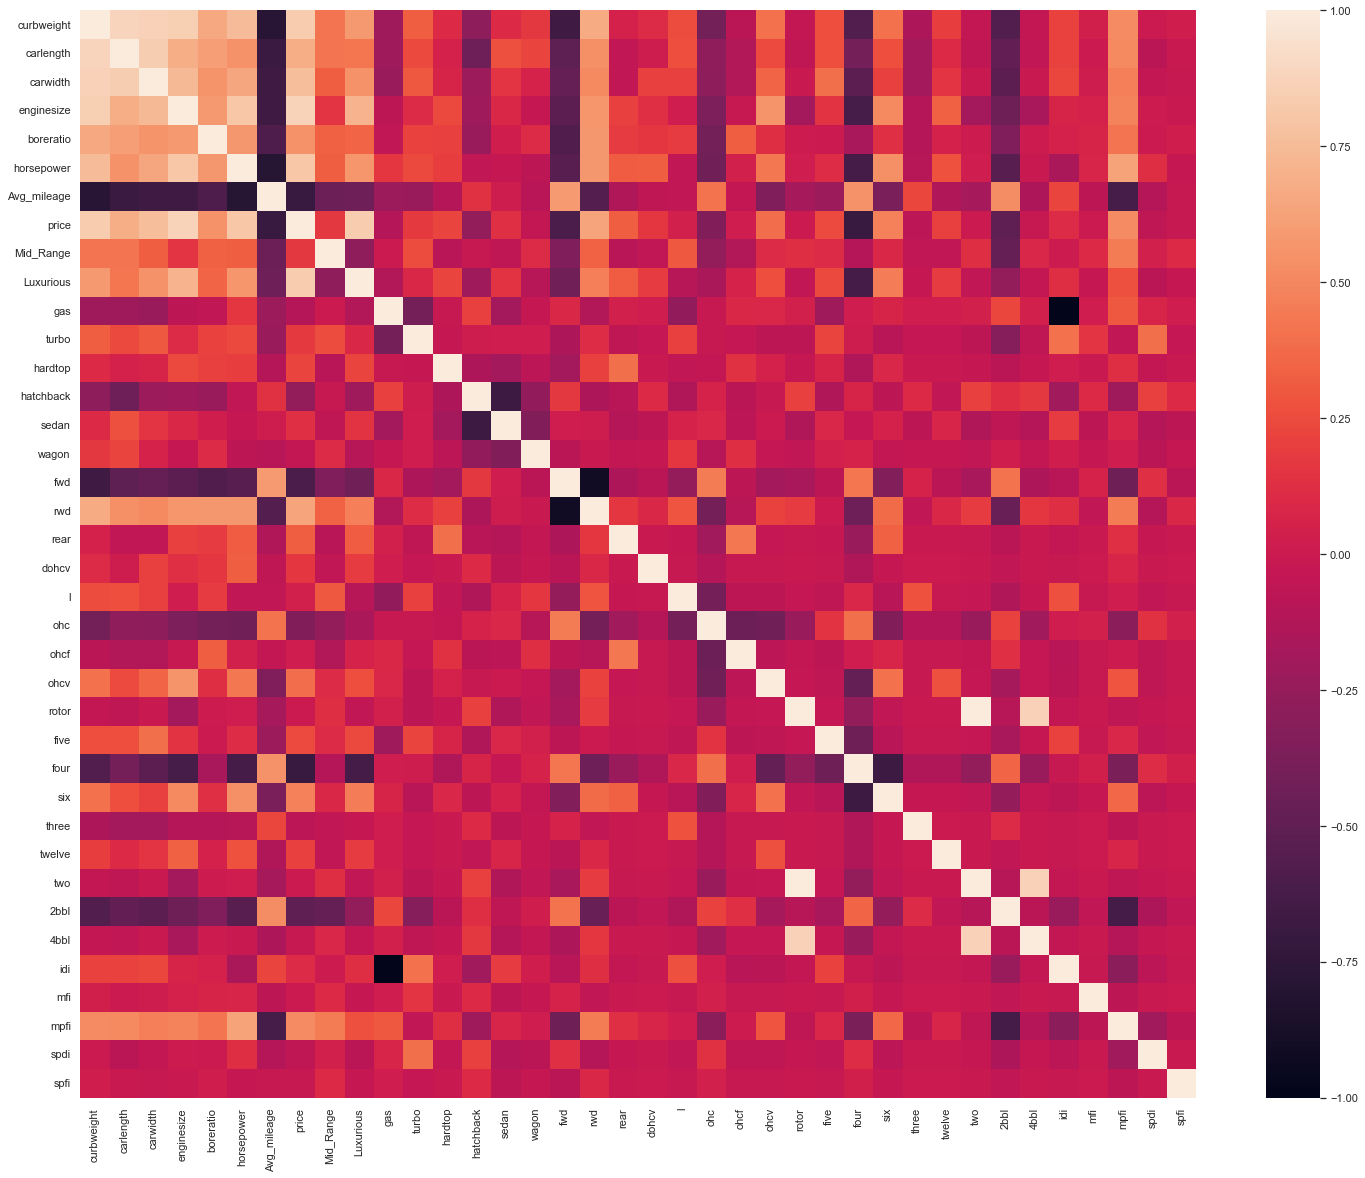

In [58]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(correlation,annot=False,linecolor='white')

In [59]:
df_train,df_test=train_test_split(final_df,test_size=20,shuffle=True,random_state=42)

In [60]:
print("The shape of the train data: {}".format(df_train.shape))
print("The shape of the test data: {}".format(df_test.shape))

The shape of the train data: (185, 38)
The shape of the test data: (20, 38)


In [61]:
df_train.head()

,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,Avg_mileage,price,Mid_Range,Luxurious,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
60,2410,177.8,66.5,122,3.39,84,29.0,8495.0,0,0,...,0,0,0,1,0,0,0,0,0,0
101,3095,181.7,66.5,181,3.43,152,19.5,13499.0,1,0,...,0,0,0,0,0,0,0,1,0,0
98,2008,162.4,63.8,97,3.15,69,34.0,8249.0,0,0,...,0,0,0,1,0,0,0,0,0,0
30,1713,144.6,63.9,92,2.91,58,51.5,6479.0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1989,157.3,63.8,90,2.97,68,34.5,6692.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
df_test.head()

,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,Avg_mileage,price,Mid_Range,Luxurious,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
15,3230,189.0,66.9,209,3.62,182,19.0,30760.000,0,1,...,0,0,0,0,0,0,0,1,0,0
9,3053,178.2,67.9,131,3.13,160,19.0,17859.167,1,0,...,0,0,0,0,0,0,0,1,0,0
100,2302,173.4,65.2,120,3.33,97,30.5,9549.000,0,0,...,0,0,0,1,0,0,0,0,0,0
132,2658,186.6,66.5,121,3.54,110,24.5,11850.000,1,0,...,0,0,0,0,0,0,0,1,0,0
68,3750,190.9,70.3,183,3.58,123,23.5,28248.000,0,1,...,0,0,0,0,0,1,0,0,0,0


##### Feature Scaling:
- standardising: The train df contains the categorical and numeric data

In [63]:
def standardise_data(lis,df):
    stdscaler=StandardScaler()
    df[lis]=stdscaler.fit_transform(df[lis])
    return df

In [64]:
scale_vars=['curbweight','carlength','carwidth','enginesize','boreratio','horsepower','Avg_mileage','price']

In [65]:
df_train=standardise_data(scale_vars,df_train)
df_test=standardise_data(scale_vars,df_test)

In [66]:
df_train[['curbweight','carlength','carwidth','enginesize','boreratio','horsepower','Avg_mileage','price']].describe()

,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,Avg_mileage,price
count,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02
mean,1.788359e-16,4.686942e-16,1.464294e-15,-8.401688e-17,8.593726e-16,-1.140229e-16,1.044210e-16,2.880579e-17
std,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00,1.002714e+00
min,-1.638771e+00,-2.408069e+00,-1.945621e+00,-1.403110e+00,-2.896220e+00,-1.331188e+00,-2.010440e+00,-1.035167e+00
25%,-7.986989e-01,-6.318603e-01,-9.058787e-01,-7.323727e-01,-6.499077e-01,-8.740981e-01,-8.405990e-01,-7.008110e-01
50%,-2.639310e-01,-6.707515e-02,-1.969635e-01,-1.858460e-01,-6.071113e-02,-2.392514e-01,-1.386946e-01,-3.362102e-01
75%,7.706019e-01,7.760099e-01,4.646907e-01,4.600493e-01,9.335581e-01,2.940198e-01,6.411991e-01,4.177490e-01
max,2.936898e+00,2.339401e+00,3.016785e+00,4.956474e+00,2.259250e+00,4.661765e+00,3.682785e+00,4.105487e+00


In [67]:
df_test[['curbweight','carlength','carwidth','enginesize','boreratio','horsepower','Avg_mileage','price']].describe()

,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,Avg_mileage,price
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,1.360023e-16,6.425416e-16,-4.385381e-16,8.326673e-17,2.187139e-15,9.436896e-17,-5.811324e-18,-6.106227e-17
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-1.887019e+00,-2.534658e+00,-2.351836e+00,-1.348760e+00,-1.763689e+00,-1.333789e+00,-1.633236e+00,-9.409548e-01
25%,-5.440159e-01,-4.748909e-01,-6.065821e-01,-6.343132e-01,-7.054756e-01,-7.895127e-01,-7.356920e-01,-6.178010e-01
50%,-2.559450e-01,-7.819488e-02,-1.596269e-01,-1.998521e-01,-1.567724e-01,-1.826765e-01,-1.471384e-02,-4.109189e-01
75%,2.772738e-01,3.337586e-01,3.298955e-01,1.187527e-01,9.014411e-01,4.867202e-01,3.825598e-01,7.944862e-02
max,2.382271e+00,2.576617e+00,2.500821e+00,3.420657e+00,1.724496e+00,2.069499e+00,2.486639e+00,2.994367e+00


# All the numeric features are now standardised in both the train and test data frames

In [68]:
y_train = df_train.pop('price')
X_train = df_train

In [69]:
X_train.columns

Index(['curbweight', 'carlength', 'carwidth', 'enginesize', 'boreratio',
       'horsepower', 'Avg_mileage', 'Mid_Range', 'Luxurious', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [70]:
y_train

60    -0.604205
101    0.034389
98    -0.635599
30    -0.861480
25    -0.834298
         ...   
106    0.659710
14     1.446594
92    -0.814262
179    0.353303
102    0.149244
Name: price, Length: 185, dtype: float64

In [71]:
lin_reg = LinearRegression()

rfe_model = RFECV(lin_reg,cv=5) 
rfe_values=rfe_model.fit(X_train,y_train) 
rfe_values.support_
rfe_values.ranking_ 

array([15, 16, 13,  1,  8,  1, 17,  1,  1,  1,  1,  1,  6, 12, 11,  4,  3,
        1,  1,  2,  5,  7,  1,  1,  1,  1,  1, 19,  1,  1, 18, 14,  1,  1,
       10,  1,  9])

In [72]:
print("Num Features: %s" % (rfe_values.n_features_))
print("Selected Features: %s" % (rfe_values.support_))
print("Feature Ranking: %s" % (rfe_values.ranking_))  

Num Features: 19
Selected Features: [False False False  True False  True False  True  True  True  True  True
 False False False False False  True  True False False False  True  True
  True  True  True False  True  True False False  True  True False  True
 False]
Feature Ranking: [15 16 13  1  8  1 17  1  1  1  1  1  6 12 11  4  3  1  1  2  5  7  1  1
  1  1  1 19  1  1 18 14  1  1 10  1  9]


In [73]:
rfe_output_dict={
                    'Features':list(X_train.columns),
                    'support':rfe_values.support_,
                    'Ranking':rfe_values.ranking_ 
                }

In [74]:
rfe_output_df=pd.DataFrame.from_dict(rfe_output_dict)
rfe_output_df.sort_values('Ranking',ascending=True)

,Features,support,Ranking
18,dohcv,True,1
23,rotor,True,1
22,ohcv,True,1
35,spdi,True,1
17,rear,True,1
26,six,True,1
28,twelve,True,1
24,five,True,1
11,hardtop,True,1
10,turbo,True,1


In [75]:
rfe_output_df.shape

(37, 3)

In [76]:
X_train.columns[rfe_model.support_]

Index(['enginesize', 'horsepower', 'Mid_Range', 'Luxurious', 'gas', 'turbo',
       'hardtop', 'rear', 'dohcv', 'ohcv', 'rotor', 'five', 'four', 'six',
       'twelve', 'two', 'idi', 'mfi', 'spdi'],
      dtype='object')

In [77]:
X_train_new=X_train[X_train.columns[rfe_model.support_]]

In [78]:
X_train_new= sm.add_constant(X_train_new)

In [79]:
def build_linear_model(X,y):
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

### 1. Basic Model

In [80]:
X_train_new = build_linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     168.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.52e-95
Time:                        21:46:29   Log-Likelihood:                 5.4873
No. Observations:                 185   AIC:                             25.03
Df Residuals:                     167   BIC:                             82.99
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6655      0.178      3.732      0.0

From the OLS summary:
    - The **R2 and adj R2** are having good values.
    - The **F stistic and prob(F statistic)** convey that that model is significant.(F test tells the goodness of fit of a regression.)
    - **AIC** value is also less
    - The coefficients for **gas and turbo** include 0 in the CI lowert and upper limit. P>0.05
      there could be chance that these variables are not influencing Y.
    - for all **the other predictor variables** (excluding gas and turbo)we can reject the Null hypothesis ( variable X has no influence on Y) at significance level of 5%
    - **Omnibus/Prob(Omnibus)** – a test of the skewness and kurtosis of the residual 
    OMnibus: We hope to see a value close to zero which would indicate normalcy. 
    prob(omnibus): The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 
    
    here the residuals are not normally distributed
    - Skew – a measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal
    
    there is skewness
    - Kurtosis – a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.
    
    - Durbin-Watson – tests for homoscedasticity (characteristic #3). We hope to have a value between 1 and 2. In this case, the data is within limits.
    - Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test. In this case we do.
    - Condition Number – This test measures the sensitivity of a function's output as compared to its input . When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 30. 


Need to resolve multicollinearity problem

In [81]:
#dropping the gas turbo feature as it s p>0.05 and is insignificant
X_train_new=X_train_new.drop(['gas','turbo'],axis=1)

### 2. Model after removing insignificant terms

In [82]:
X_train_new = build_linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           5.36e-96
Time:                        21:46:29   Log-Likelihood:                 3.7465
No. Observations:                 185   AIC:                             26.51
Df Residuals:                     168   BIC:                             81.25
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8277      0.257      3.219      0.0

In [83]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,rotor,inf
14,two,inf
0,const,197.49
11,four,35.57
12,six,13.75
1,enginesize,9.90
2,horsepower,8.43
10,five,8.03
4,Luxurious,4.23
8,ohcv,2.80


### 3. Model after removing multicollinearity caused by "Rotor"

In [84]:

X_train_new=X_train_new.drop(['rotor'],axis=1)
X_train_new= build_linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           5.36e-96
Time:                        21:46:29   Log-Likelihood:                 3.7465
No. Observations:                 185   AIC:                             26.51
Df Residuals:                     168   BIC:                             81.25
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8277      0.257      3.219      0.0

In [85]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,197.49
10,four,35.57
11,six,13.75
1,enginesize,9.90
2,horsepower,8.43
9,five,8.03
13,two,6.78
4,Luxurious,4.23
8,ohcv,2.80
7,dohcv,2.41


### 4. Model after removing Multicollinearity term "four"

In [86]:
X_train_new=X_train_new.drop(['four'],axis=1)
X_train_new = build_linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     169.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           2.17e-93
Time:                        21:46:29   Log-Likelihood:                -5.7616
No. Observations:                 185   AIC:                             43.52
Df Residuals:                     169   BIC:                             95.05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2550      0.043     -5.996      0.0

### 5. Model after removing insignificant term "five"

In [87]:
X_train_new=X_train_new.drop(['five'],axis=1)
X_train_new = build_linear_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     182.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.70e-94
Time:                        21:46:29   Log-Likelihood:                -5.8422
No. Observations:                 185   AIC:                             41.68
Df Residuals:                     170   BIC:                             89.99
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2549      0.042     -6.009      0.0

In [88]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,horsepower,8.19
1,enginesize,7.84
0,const,4.91
4,Luxurious,3.63
3,Mid_Range,2.34
9,six,2.18
8,ohcv,1.78
6,rear,1.69
7,dohcv,1.67
10,twelve,1.51


### 6. Model after removing Multicollinearity term horsepower

In [89]:
X_train_new=X_train_new.drop(['horsepower'],axis=1)
X_train_new = build_linear_model(X_train_new,y_train)         

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     165.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.69e-89
Time:                        21:46:30   Log-Likelihood:                -21.246
No. Observations:                 185   AIC:                             70.49
Df Residuals:                     171   BIC:                             115.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3514      0.042     -8.378      0.0

### 7. Model after removing insignificant term idi and dohcv 

In [90]:
X_train_new=X_train_new.drop(['dohcv','idi'],axis=1)
X_train_new = build_linear_model(X_train_new,y_train)   

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           8.84e-92
Time:                        21:46:30   Log-Likelihood:                -21.285
No. Observations:                 185   AIC:                             66.57
Df Residuals:                     173   BIC:                             105.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3534      0.041     -8.640      0.0

In [91]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,5.18
0,const,3.93
3,Luxurious,3.48
7,six,1.96
2,Mid_Range,1.76
6,ohcv,1.75
5,rear,1.48
8,twelve,1.42
4,hardtop,1.36
9,two,1.19


### 8. Model after removing insignificant term 'hardtop','ohcv','spdi'

In [92]:
X_train_new=X_train_new.drop(['hardtop','ohcv','spdi'],axis=1)
X_train_new = build_linear_model(X_train_new,y_train)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     266.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           3.69e-94
Time:                        21:46:30   Log-Likelihood:                -24.306
No. Observations:                 185   AIC:                             66.61
Df Residuals:                     176   BIC:                             95.60
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3947      0.037    -10.637      0.0

In [93]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,3.92
0,const,3.18
3,Luxurious,3.17
2,Mid_Range,1.67
5,six,1.67
6,twelve,1.34
4,rear,1.21
7,two,1.17
8,mfi,1.02


In [94]:
X_train_new

,const,enginesize,Mid_Range,Luxurious,rear,six,twelve,two,mfi
60,1.0,-0.111320,0,0,0,0,0,0,0
101,1.0,1.354366,1,0,0,1,0,0,0
98,1.0,-0.732373,0,0,0,0,0,0,0
30,1.0,-0.856583,0,0,0,0,0,0,0
25,1.0,-0.906268,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
106,1.0,1.354366,1,0,0,1,0,0,0
14,1.0,0.932050,0,1,0,1,0,0,0
92,1.0,-0.732373,0,0,0,0,0,0,0
179,1.0,1.105945,1,0,0,1,0,0,0


In [95]:
lin_reg = LinearRegression()

In [96]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lin_reg, X_train_new, y_train, scoring='r2', cv=folds)
scores 

array([0.90217551, 0.82410902, 0.81608863, 0.92932654, 0.94610151])

In [97]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

In [98]:
print("Training accuracy:{}".format(np.round(r2_score(y_train, y_train_pred),2)))

Training accuracy:0.92


In [99]:
Training_accuracy=np.round(r2_score(y_train, y_train_pred),2)

In [100]:
X_train_new.columns

Index(['const', 'enginesize', 'Mid_Range', 'Luxurious', 'rear', 'six',
       'twelve', 'two', 'mfi'],
      dtype='object')

## Model evaluation:

In [101]:
y_test = df_test.pop('price')
X_test = df_test

In [102]:
X_test_new = X_test[['enginesize', 'Mid_Range', 'Luxurious', 'rear', 'six','twelve', 'two', 'mfi']]

In [103]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [104]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

In [105]:
print("Testing accuracy:{}".format(np.round(r2_score(y_test, y_test_pred),2)))

Testing accuracy:0.96


In [106]:
Testing_accuracy=np.round(r2_score(y_test, y_test_pred),2)

In [107]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     266.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           3.69e-94
Time:                        21:46:30   Log-Likelihood:                -24.306
No. Observations:                 185   AIC:                             66.61
Df Residuals:                     176   BIC:                             95.60
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3947      0.037    -10.637      0.0

Text(0.5, 0, 'Errors')

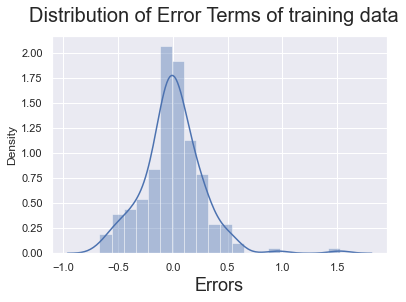

In [108]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Distribution of Error Terms of training data', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

##### Inference :
- the residuals follow normal distribution

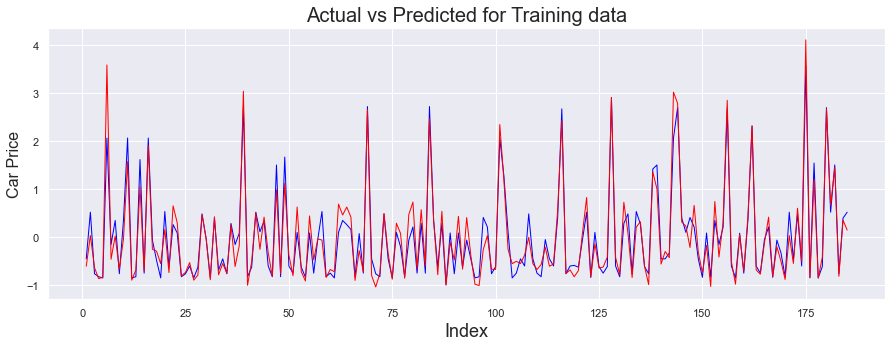

In [109]:
# Actual vs Predicted for TRAIN SET

plt.figure(figsize = (15,5))
c = [i for i in range(1,186,1)]
d = [i for i in range(1,186,1)]
plt.plot(c, y_train_pred, color="blue", linewidth=1, linestyle="-")     #Plotting Actual
plt.plot(d, y_train, color="red",  linewidth=1, linestyle="-")  #Plotting predicted
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  
plt.title('Actual vs Predicted for Training data', fontsize=20)
plt.show()

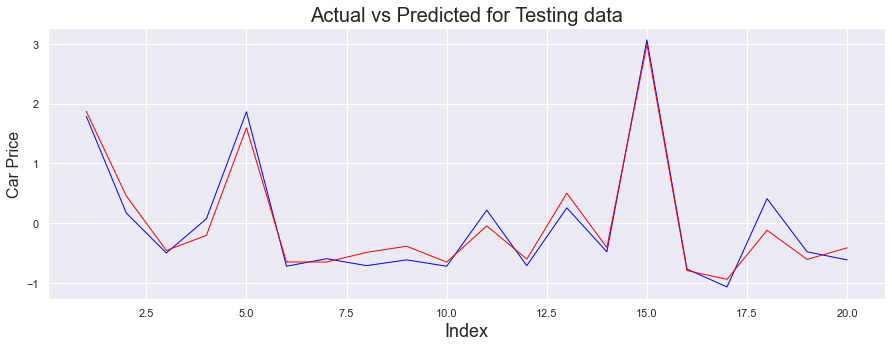

In [110]:
# Actual vs Predicted for TEST SET

plt.figure(figsize = (15,5))
c = [i for i in range(1,21,1)]
d = [i for i in range(1,21,1)]
plt.plot(c, y_test_pred, color="blue", linewidth=1, linestyle="-")     #Plotting Actual
plt.plot(d, y_test, color="red",  linewidth=1, linestyle="-")  #Plotting predicted
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  
plt.title('Actual vs Predicted for Testing data', fontsize=20)     
plt.show()

##### Inference :
the observed and predicted values are close enough

Text(0, 0.5, 'ytest-ypred')

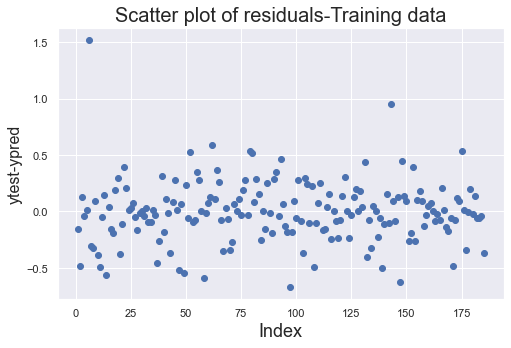

In [111]:
# Error terms for TRAIN SET
plt.figure(figsize = (8,5))
c = [i for i in range(1,186,1)]
plt.scatter(c,y_train-y_train_pred)

plt.title('Scatter plot of residuals-Training data', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'ytest-ypred')

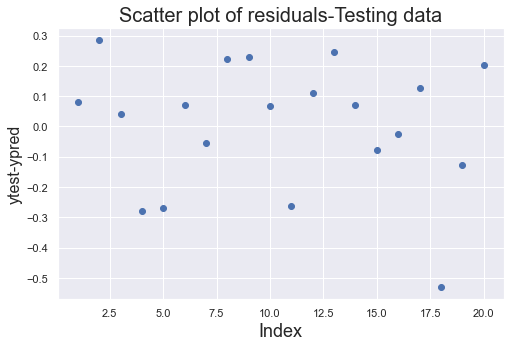

In [112]:
# Error terms for TEST SET
plt.figure(figsize = (8,5))
c = [i for i in range(1,21,1)]
plt.scatter(c,y_test-y_test_pred)
plt.title('Scatter plot of residuals-Testing data', fontsize=20)             # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

##### Inference:
The scatter plot of the error terms doesnt show any pattern. Homoscedasticity

##### The RMSE 
> is the square root of the variance of the residuals.
> It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.
> Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit.
> As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance.
> It has the useful property of being in the same units as the response variable.

> Lower values of RMSE indicate better fit.
> RMSE is a good measure of how accurately the model predicts the response.
> It’s the most important criterion for fit if the main purpose of the model is prediction.

In [113]:
#RMSE score for train set
print('RMSE :', np.sqrt(mean_squared_error(y_train, y_train_pred)))

#RMSE score for test set
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.2759447395055558
RMSE : 0.2074959377608059


#### Conclusion:
- R-sqaured and Adjusted R-squared - 0.922 and 0.920 -> ~ 92% variance is explained by the model.
  The Adjusted R2 follows the value of R2. It is a good sign.

- F-stats and Prob(F-stats) (overall model fit) - 266.9 and   3.69e-94(approx. 0.0) 

- Model is significant and explained 92% variance is just not by chance.
- p-values  for all the coefficients are less than the significance level of 0.05. 

- All the features are statistically significant.

- Cond. No.   is <30 indicating that there is no multicollinearity problem
- Prob(JB):  1.08e-43 ~0. Implies that the residuals are homoscedastic
    
- Durbin-Watson:1.985. Implies that the residuals are homoscedastic
    


In [114]:
import pickle

In [115]:
pickle.dump(lm, open('car_prediction_model.pkl', 'wb'))

In [117]:
import sklearn
sckversion=sklearn.__version__

In [119]:
import joblib
joblib.dump(lm,'car_prediction_model_{}.pkl'.format(sckversion))

['car_prediction_model_1.0.2.pkl']